(Link: https://drive.google.com/file/d/1vnsENE26qOH5y2UBEZcFG-AdF3VsKtZt/view?usp=sharing)

In [ ]:
import pandas as pd
data=pd.read_csv("/content/medical_expnse_pred.csv")
data.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [ ]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [ ]:
data2=data.copy()

In [ ]:
import numpy as np
data2["expenses"] = np.where(data2["expenses"] >= 13270 ,"High", "low")

In [ ]:
#data2.loc[data2["expenses"] >= 13270, "expenses"] = "High"

In [ ]:
data2['expenses'].value_counts()

low     918
High    420
Name: expenses, dtype: int64

In [ ]:
data2.head(2)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,High
1,18,male,33.8,1,no,southeast,low


In [ ]:
data2.drop_duplicates(inplace=True)

In [ ]:
cat_cols = data2.select_dtypes(exclude = 'number')

cat_cols.columns

Index(['sex', 'smoker', 'region', 'expenses'], dtype='object')

In [ ]:
cat_cols=cat_cols.drop('expenses',axis=1)
cat_cols.columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
num_cols = data2.select_dtypes(include = 'number')
num_cols.columns

Index(['age', 'bmi', 'children'], dtype='object')

In [ ]:
onehot_cat_cols = pd.get_dummies(cat_cols)

In [ ]:
X = pd.concat([num_cols,onehot_cat_cols],axis=1)

In [ ]:
X.head(2)

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,1,0,0,1,0,0,0,1
1,18,33.8,1,0,1,1,0,0,0,1,0


In [ ]:
y = data2['expenses']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt,ceil
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#sqrt(data2.shape[0])

In [ ]:
#l = ceil(sqrt(data2.shape[0]))#closest int value
l

37

In [ ]:
Estimator_list = []
Accuracy_list= []

from sklearn.neighbors import KNeighborsClassifier

Knn = KNeighborsClassifier(n_neighbors = 1) # n_neighbors=1 gives the best result for this data
Knn.fit(X_train, y_train)
Knn_accuracy = round(Knn.score(X_test, y_test)*100,2)

print("Knn_accuracy is ", Knn_accuracy,"%")

Estimator_list.append("KNN")
Accuracy_list.append(Knn_accuracy)

Knn_accuracy is  76.72 %


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
knn = KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5,)
model.fit(X_train,y_train)
model.best_params_

{'n_neighbors': 3}

In [ ]:
acc = []
for k in range(1,12):
    k = k+1
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    y_test_pred = model.predict(X_test)
    accuracy=model.score(X_test,y_test)
    acc.append(accuracy)
    #print('Accuracy  value for k=' , k , 'is:', accuracy)

In [ ]:
curve = pd.DataFrame(acc,columns=['Accuracy for test data'])

In [ ]:
#curve.head()

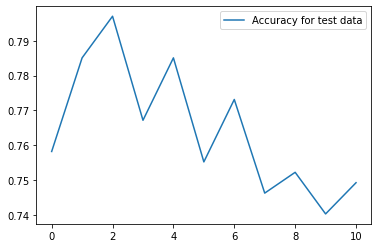

In [ ]:
curve.plot()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVC
est=svm.SVC(kernel='linear')
est.fit(X_train,y_train)
SVM_accuracy = round(est.score(X_test, y_test)*100,2)
Estimator_list.append("SVM")
Accuracy_list.append(SVM_accuracy)

In [ ]:
df = pd.DataFrame({'METHOD': Estimator_list, 'ACCURACY (%)': Accuracy_list})
df = df.sort_values(by=['ACCURACY (%)'])
df = df.reset_index(drop=True)
df.head()

,METHOD,ACCURACY (%)
0,KNN,76.72
1,SVM,88.06
